In [1]:
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings("ignore", category = FutureWarning)
sns.set(style = "white" , color_codes = True)

In [2]:
import pandas as pd
dataset = pd.read_csv('Iris.csv')

In [3]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_setosa_data = dataset.iloc[0:50 , :]
iris_versicolor_data = dataset.iloc[51:100 , :]
iris_virginica_data = dataset.iloc[101:150 , :]

<h1> Mean, Variance, Standard Deviation </h1>

<h2> Mean </h2>

Mean is the <b>CENTRAL TENDENCY</b> or the <b> AVERAGE VALUE </b> of a set of given observations. Mathematical defination of mean is :

$$\bar{X} = \frac{\sum_{i=1}^{n} x_{i}}{n}$$

In [5]:
print("MEANS")
print(np.mean(iris_setosa_data['PetalLengthCm']) , "--setosa")
print(np.mean(iris_versicolor_data['PetalLengthCm']) , "--versicolor")
print(np.mean(iris_virginica_data['PetalLengthCm']) , "--virginica")

MEANS
1.464 --setosa
4.2510204081632645 --versicolor
5.542857142857144 --virginica


<h3> Observations </h3>
<p><b> So, why mean  ??</b> </p>
<p> By using the mean we can perform very initial EDA. For example, just by looking at the values of the means of the petal lenght, we can easily tell that <b>Iris Setosa</b> has a much smaller petal length on average when comapre to <b> Iris Versicolor</b> and <b>Iris Virginica</b>. 

In [6]:
#Mean with an outlier
print(np.mean(np.append(iris_setosa_data['PetalLengthCm'] , 50)))

2.4156862745098038


<h3> So what is the problem ?? </h3>
<p> Even after 50 values all say that the petal length of setosa flowers are around 1.464 cm , If there is even a single wrong data, it can shift the mean wildly. </p>

<p> These error can happen because of human mistakes or data corruption or any other reasons. Such data points are called as <b>"OUTLIERS"</b>.

<h2>Variance</h2>

<p>Variance represents the spread of the given observations. It is the average square distance of the observation from  mean.</p>
<p> The formula for the variance of a population is given by : </p>

$$s^{2} = \frac{SS}{N} = \frac{\sum (x_{i} - \bar{x})^{2}}{N}$$

<p> Where <ul>
    <li>$SS$ is the sum of squared errors</li>
    <li>$N$ is the number of observations in the group</li>
    <li>$x_i$ is the $i^{th}$ observation in the group</li>
    <li>$\bar{x}$ is the mean of the group </li>
    
    
    
        

In [20]:
print("VARIANCE")
print(np.var(iris_setosa_data['PetalLengthCm']) , "--setosa")
print(np.var(iris_versicolor_data['PetalLengthCm']) , "--versicolor")
print(np.var(iris_virginica_data['PetalLengthCm']) , "--virginica")

VARIANCE
0.029504000000000002 --setosa
0.21678467305289467 --versicolor
0.30040816326530617 --virginica


In [21]:
#Variance with an outlier
print(np.var(np.append(iris_setosa_data['PetalLengthCm'] , 50)))

45.31426374471357


<h2> Standard Deviation </h2>

In the following graph, the standard deviation shows the spread of the graph


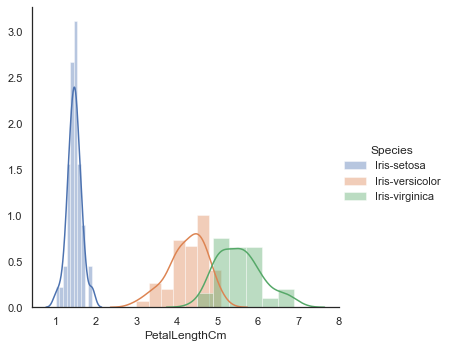

In [7]:
sns.FacetGrid(dataset , hue = "Species" , height = 5)\
.map(sns.distplot , "PetalLengthCm")\
.add_legend()

print("In the following graph, the standard deviation shows the spread of the graph")

<p> Standard Deviation represents the average deviation of the observations form the mean value. </p>

$$s = \sqrt{s^{2}} = \sqrt{\frac{SS}{N}} = \sqrt{\frac{\sum (x_{i} - \bar{x})^{2}}{N}}$$

<p> Where <ul>
    <li>$s^2$ is the variance</li>
    <li>$SS$ is the sum of squared errors</li>
    <li>$N$ is the number of observations in the group</li>
    <li>$x_i$ is the $i^{th}$ observation in the group</li>
    <li>$\bar{x}$ is the mean of the group </li>
    

In [8]:
print("STANDARD DEVIATION")
print(np.std(iris_setosa_data['PetalLengthCm']) , "--setosa")
print(np.std(iris_versicolor_data['PetalLengthCm']) , "--versicolor")
print(np.std(iris_virginica_data['PetalLengthCm']) , "--virginica")

STANDARD DEVIATION
0.17176728442867112 --setosa
0.46560141006325856 --versicolor
0.5480950312357394 --virginica


In [9]:
#Standard Deviation with an outlier
print(np.std(np.append(iris_setosa_data['PetalLengthCm'] , 50)))

6.731587015311736


So, here we can clearly see that without any plots, we can easily get an initial estimation of the distribution of out values by the help of only the mean and standard deviaiton.

But the problem here is that these parameters are extremely sensitive to outliers.

So, how do we solve this ???

<h1> Median, Percentiles, Quantiles, IQR</h1>

<h3> Median </h3>
<p> Median is the statistical measure that determines the middle value of a dataset listed in ascending order. This measure divides the lower half from the upper half of the dataset. </p>

In [10]:
print("MEDIANS")
print(np.median(iris_setosa_data['PetalLengthCm']) , "--setosa")
print(np.median(iris_versicolor_data['PetalLengthCm']) , "--versicolor")
print(np.median(iris_virginica_data['PetalLengthCm']) , "--virginica")

MEDIANS
1.5 --setosa
4.3 --versicolor
5.5 --virginica


In [11]:
#Median with an outlier
print(np.median(np.append(iris_setosa_data['PetalLengthCm'] , 50)))

1.5


For a set of point which are uniform-ishly distributed about a central value, the median and mean are pretty simillar to each other.

EXAMPLE:
    for values [1,2,3,4,5,6,7,8,9], mean=median=5.

Since the median depends only on the middle values of the data, so if we have a small number of outlier, then it can't corrupt the median.

<h3> Percentiles and Quantiles </h3>

<p> A percentile is a term used in statistics to express how a score compares to other scores in the same set. While there is technically no standard definition of percentile, it's typically communicated as the percentage of values that fall below a particular value in a set of data scores. </p>

<p> If the  $n^{th}$ percentile value is "X", this tells you that <b>n%</b> of the values in your data are less than "X". </p>

<p> The $50^{th}$ percentile value is the median. </p>
<p> The $25^{th}$, $50^{th}$, $75^{th}$, $100^{th}$ percentiles are called as <b>"QUANTILES"</b></p>



In [12]:
print("PERCENTILES AND QUANTILES")
print(np.percentile(iris_setosa_data['PetalLengthCm'] , np.arange(0 , 100 , 25)) , "--setosa") #Here I am saying that I want all the 25nth percentiles between 0-100
print(np.percentile(iris_versicolor_data['PetalLengthCm'] , np.arange(0 , 100 , 25)) , "--versicolor")
print(np.percentile(iris_virginica_data['PetalLengthCm'] , np.arange(0 , 100 , 25)) , "--virginica")

PERCENTILES AND QUANTILES
[1.    1.4   1.5   1.575] --setosa
[3.  4.  4.3 4.6] --versicolor
[4.5 5.1 5.5 5.8] --virginica


<h4>So, it is printing- [minimum value, 25th percentile, 50th percentils, 75th percentile]</h4>

In [13]:
print("90th PERCENTILES")
print(np.percentile(iris_setosa_data['PetalLengthCm'] , 90)  , "--setosa")
print(np.percentile(iris_versicolor_data['PetalLengthCm'] , 90) , "--versicolor")
print(np.percentile(iris_virginica_data['PetalLengthCm'] , 90) , "--virginica")

90th PERCENTILES
1.7 --setosa
4.8 --versicolor
6.32 --virginica


<h4> Why the heck are we reading about $90^{th}$ percentiles ??!! </h4>
<p> Imagine you are a data scientist in an E-commerce company like amazon. You get the data about the delivery times of various producs to various customers. </p>
<p> In this case the $95^{th}$ and the $99^{th}$ percentile will tell you about the time taken to deliver the item to 90% of your customers. </p>
<p> This is extremely important as this will give you a very clear idea about the customers satisfaction of majority of your customers. </p>
<p> You can later submit your finding to the supply chain manager who can then focus the resources to decrease the delivery time of the rest of 5% or 1% of your customers. </p>

<h2> Box-Plots and Whiskers </h2>

<p> The distribution plot that we studied earlier gave a us an idea about the density and distribution of the values. It was really helpful for mean based EDA. </p>
<p> But it did not give us a ver clear idea about the median or the percentiles. So, for that we are going to use the box plots. </p>

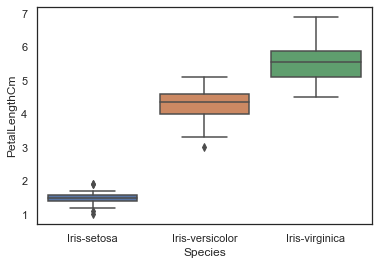

In [14]:
sns.boxplot(x='Species' , y='PetalLengthCm' , data = dataset)
plt.show()

<h4> UNDERSTANDING THE BOX PLOT </h4>
<ul>
    <li>The X-axis is divided into the number of classes you have, in this case 3. </li>
    <li>The lower line of the box represents the $25^{th}$ percentile of the observations </li>
    <li>The Middle line of the box represents the $50^{th}$ percentile of the observations </li>
    <li>The upper line of the box represents the $75^{th}$ percentile of the observations </li>
    <li>The distance between the $25^{th}$ percetile and the $75^{th}$ percentile is known as the Inner Quantile Range(IQR) </li>
    <li>The whiskers are a bit tricky to draw. <ul>
        <li> The lower whisker is drawn till the last data point or the value $1.5*IQR$ whichever is smaller</li>
        <li> The upper whisker is drawn till the last data point or the value $1.5*IQR$ whichever is smaller</li>
        <li> If there are any values outside the $1.5*IQR$ range, then they are represented as the diamond shapes and are termed as "OUTLIERS". </li>


Note:
    There is no standard way of drawing whiskers. We can draw whiskers by using the min and max value as well. 

<h3> Observations form a box plot with whiskers </h3>
<ul>
    <li>It tells about the quantiles of the data </li>
    <li>It tells us about outliers</li>
    <li>It tell us about the max and min value of the data </li>
    <li>It can also tell us about the error percentage while creating decision boundaries (how much of one class is mis-classified when we create a decision boundary) </li>

<h2> Violin Plots </h2>
<p>Combining histograms, pdfs and box-plots</p>

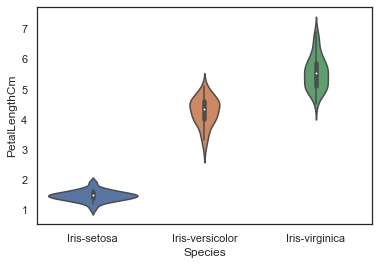

In [15]:
sns.violinplot(x = "Species" , y = "PetalLengthCm" , data=dataset)
plt.show()

<h3> Understanding the violin plots </h3>
<ul>
    <li>The X-axis is divided into n parts where n is your number of classes (here 3) </li>
    <li>The thick black part in the between represents the box of the box-plot. The white center is the $50^{th}$ percentile. The lines are the whiskers. </li>
    <li>The shapes around the box are basically the density curves rotated 90 degrees. </li>
    </ul>

<h3> Observations </h3>
<ul>
    <li> It gives us an idea about the mean and standard deviation</li>
    <li> It also gives us an idea about the median and the percentiles </li>
    <li> It is the child of density plots anfd whiskers. Best of both worlds. </li> </ul>


Since we have learnt so many things in Exploratory Data Analysis, now is a good time to pause and reflect on all of it. 
<h4>
While doing EDA it is very easy to stray from our objective. We must never do that. All of our EDA must be focussed towards our objective. </h4>

<h2> Multivariate Probability Density</h2>

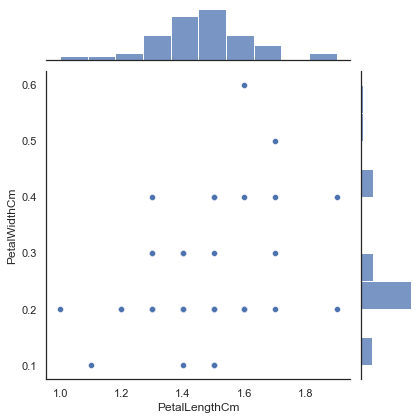

In [16]:
sns.jointplot(x = "PetalLengthCm" , y = "PetalWidthCm" , data=iris_setosa_data  , cmap = "Blues")
plt.show()

<h2> Multivariate Probabiliy Density using Contour Plots </h2>

<h3> Understanding the plot </h3>
<ul><li><p>Marginal plot wrt X </p>
<img src = "https://j.gifs.com/r28BGW.gif">
<li><p>Marginal plot wrt Y </p>
<img src = "https://j.gifs.com/BrNOJo.gif">

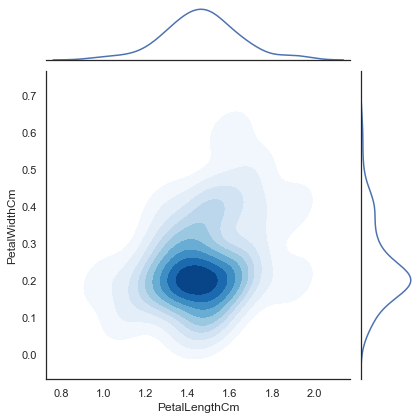

In [17]:
sns.jointplot(x = "PetalLengthCm" , y = "PetalWidthCm" , data=iris_setosa_data  , kind = "kde" , cmap = "Blues" , shade=True)
plt.show()

without contours


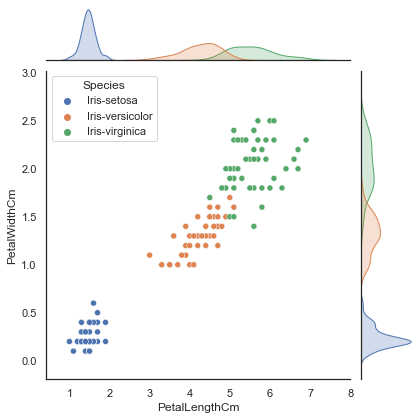

with contours


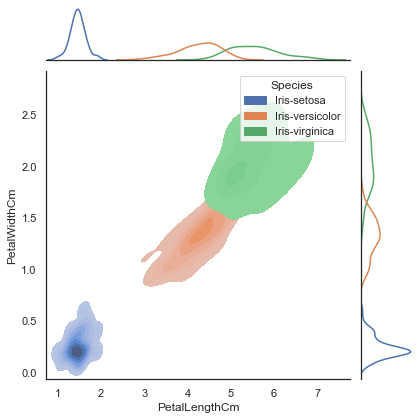

In [19]:
#Multivariate density plots for the entire dataset
sns.jointplot(data=dataset, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
print("without contours")
plt.show()
sns.jointplot(data=dataset, x="PetalLengthCm", y="PetalWidthCm", hue="Species" ,kind='kde' , shade=True)
print("with contours")
plt.show()

<h3> Observations </h3>
<ul>
    <li>This gives us a clear idea about the joint distribution of multiple variables and the marginal distributions of individual variables. These plots can be used to get information abouthow two features are dependent on each other throughout the space. </li>
    <li> This gives a more precise idea about the density of the feautres wen compared to a scattered plot. This is really useful when there are many overlapping features. </li>

<h2> Correlation </h2>
<p> Instead of learning the formuu for this, we can try to understand it intuitively. </p>
<p> Correlation referes to how much on feature depends no another feature. </p>
<p> Correlation can be observed by drawing scatter plots between two features. </p>
<p> To get a numerical value of correlation we use Pearson Correlation Coefficient (you an read the amths if you are interested) </p>
<p> PCC goes form -1 to 1 where 1 shows perfect positive corelation (one variable increases lineary with another variable) and -1 show perfect negative correlation (one variable decreases linearly with another variable) </p>

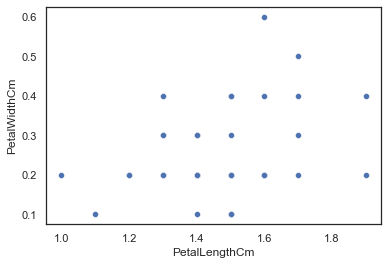

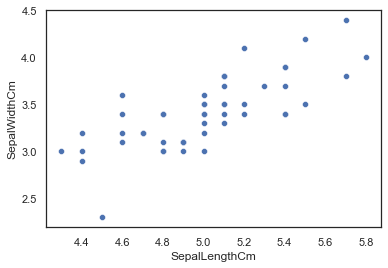

<AxesSubplot:>

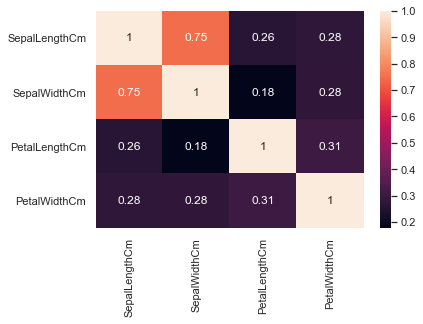

In [42]:
#For iris setosa
sns.scatterplot(iris_setosa_data['PetalLengthCm'] , iris_setosa_data['PetalWidthCm'])
plt.show()
sns.scatterplot(iris_setosa_data['SepalLengthCm'] , iris_setosa_data['SepalWidthCm'])
plt.show()
no_id = iris_setosa_data.drop(['Id'] , axis=1)
sns.heatmap(no_id.corr() , annot = True)

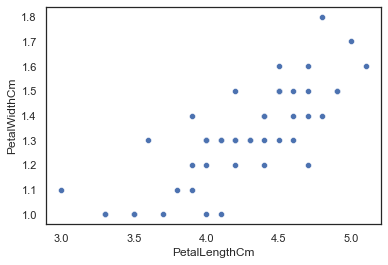

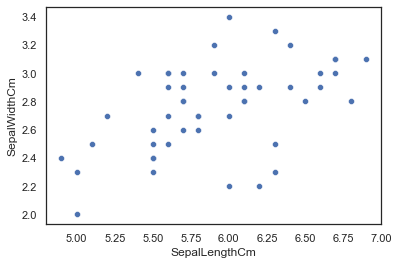

<AxesSubplot:>

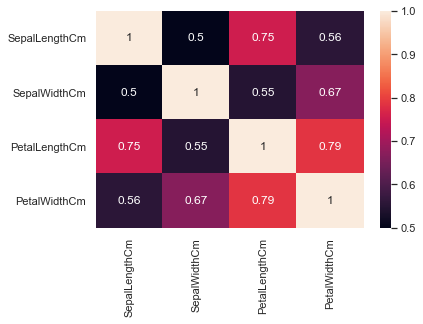

In [56]:
#For iris versicolor
sns.scatterplot(iris_versicolor_data['PetalLengthCm'] , iris_versicolor_data['PetalWidthCm'])
plt.show()
sns.scatterplot(iris_versicolor_data['SepalLengthCm'] , iris_versicolor_data['SepalWidthCm'])
plt.show()
no_id = iris_versicolor_data.drop(['Id'] , axis=1)
sns.heatmap(no_id.corr() , annot = True)

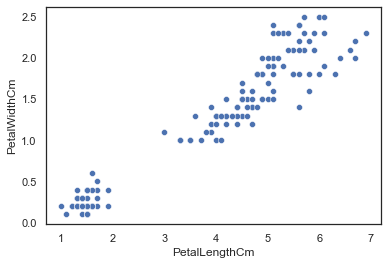

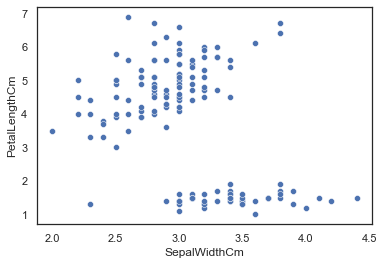

<AxesSubplot:>

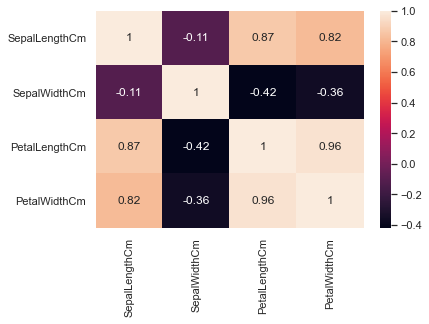

In [58]:
sns.scatterplot(dataset['PetalLengthCm'] , dataset['PetalWidthCm'])
plt.show()
sns.scatterplot(dataset['SepalWidthCm'] , dataset['PetalLengthCm'])
plt.show()
no_id = dataset.drop(['Id'] , axis=1)
sns.heatmap(no_id.corr() , annot = True)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>

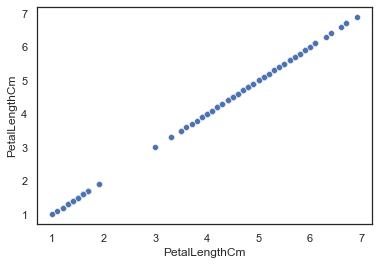

In [60]:
#perfect correlation
sns.scatterplot(dataset['PetalLengthCm'] , dataset['PetalLengthCm'])

<h4> Perfect Correlation is scary </h4>
<p> Perfect correlation means there is something seriously wromng with your data. </p>
<p> We remove highly correlated features as we want independent features to represent our data. This is done in order to decrease the time of training. Highly correlated variables don't independently contribute to the data and hence one of them is enough for the prediction. </p>

<h1> THANK YOU !!! </h1>